In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
gfs = pd.read_csv("Grades_python_output.csv")
gfs.drop(columns=["SID", "Enrl Cd", "First Name", "Last Name"], axis=1, inplace=True)

gfs["Took Final"] = gfs.apply(lambda row: not row.isnull()["Final"], axis=1)
gfs["Took M3"] = gfs.apply(lambda row: not row.isnull()["M3"], axis=1)

print(gfs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Letter Grade                     229 non-null    object 
 1   Final                            193 non-null    float64
 2   MTA                              229 non-null    float64
 3   HWT                              225 non-null    float64
 4   QTA                              229 non-null    float64
 5   Exam Reflection for Improvement  133 non-null    float64
 6   Final Exam                       189 non-null    float64
 7   M1                               219 non-null    float64
 8   M2                               202 non-null    float64
 9   M3                               172 non-null    float64
 10  Q Reflection for Improvement     117 non-null    float64
 11  QT                               229 non-null    float64
 12  Quiz 1                

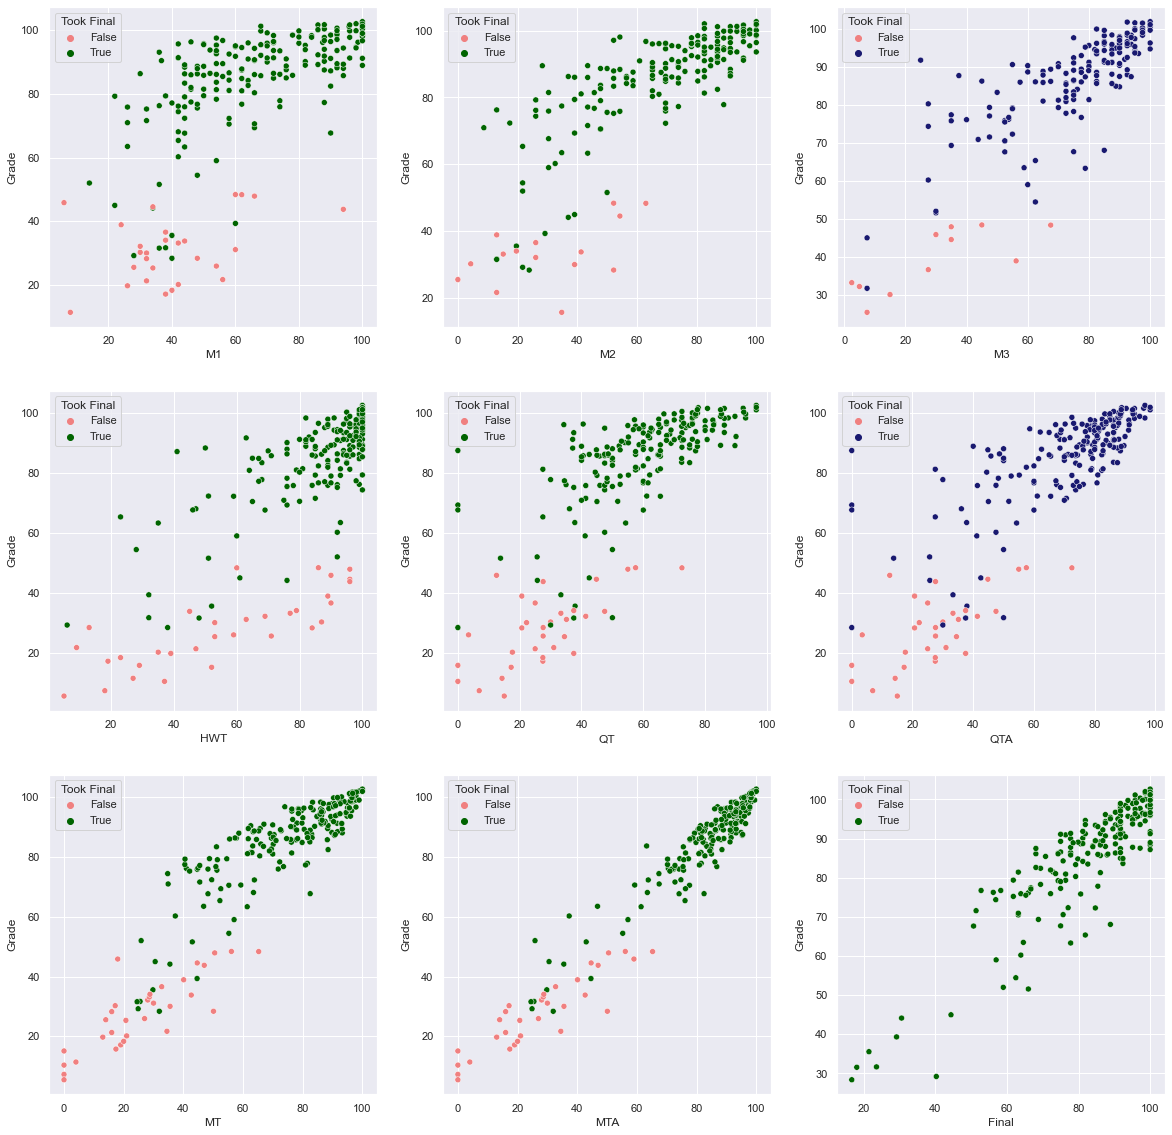

In [3]:

# color palettes as dictionaries
palette_1 = {True:"darkgreen",
           False:"lightcoral"}

palette_2 = {True:"midnightblue",
           False:"lightcoral"}

sns.set()
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
sns.scatterplot(data=gfs, x="M1", y="Grade", ax=axes[0,0], palette=palette_1, hue="Took Final")
sns.scatterplot(data=gfs, x="M2", y="Grade", ax=axes[0,1], palette=palette_1, hue="Took Final")
sns.scatterplot(data=gfs, x="M3", y="Grade", ax=axes[0,2], palette=palette_2, hue="Took Final")
sns.scatterplot(data=gfs, x="HWT", y="Grade", ax=axes[1,0], palette=palette_1, hue="Took Final")
sns.scatterplot(data=gfs, x="QT", y="Grade", ax=axes[1,1], palette=palette_1, hue="Took Final")
sns.scatterplot(data=gfs, x="QTA", y="Grade", ax=axes[1,2], palette=palette_2, hue="Took Final")
sns.scatterplot(data=gfs, x="MT", y="Grade", ax=axes[2,0], palette=palette_1, hue="Took Final")
sns.scatterplot(data=gfs, x="MTA", y="Grade", ax=axes[2,1], palette=palette_1, hue="Took Final")
sns.scatterplot(data=gfs, x="Final", y="Grade", ax=axes[2,2], palette=palette_1, hue="Took Final")

plt.savefig("Images\Features vs Grade Scatter Plots.png")
plt.show()


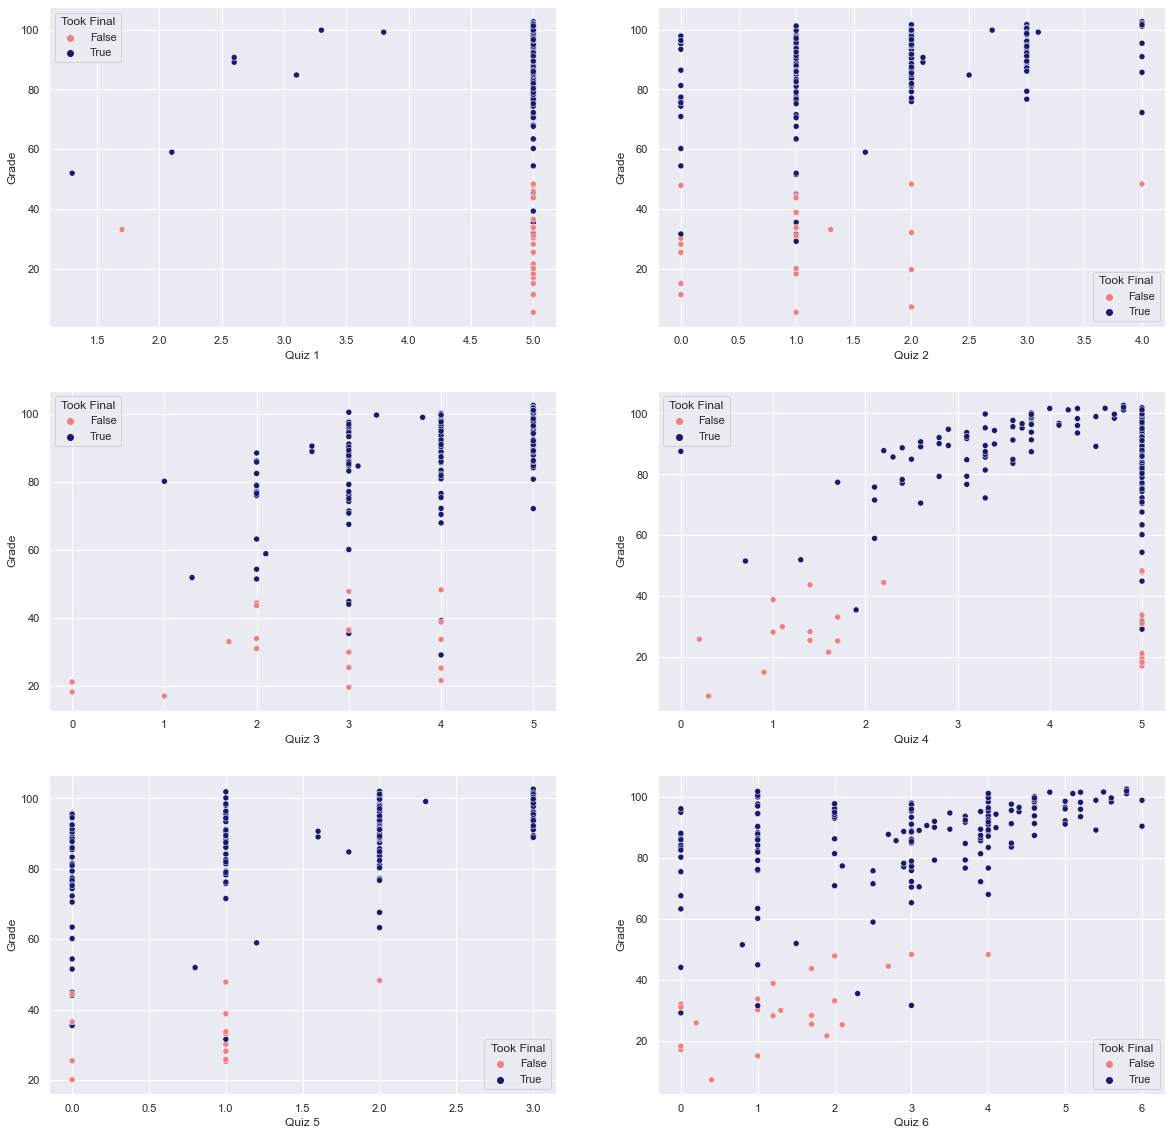

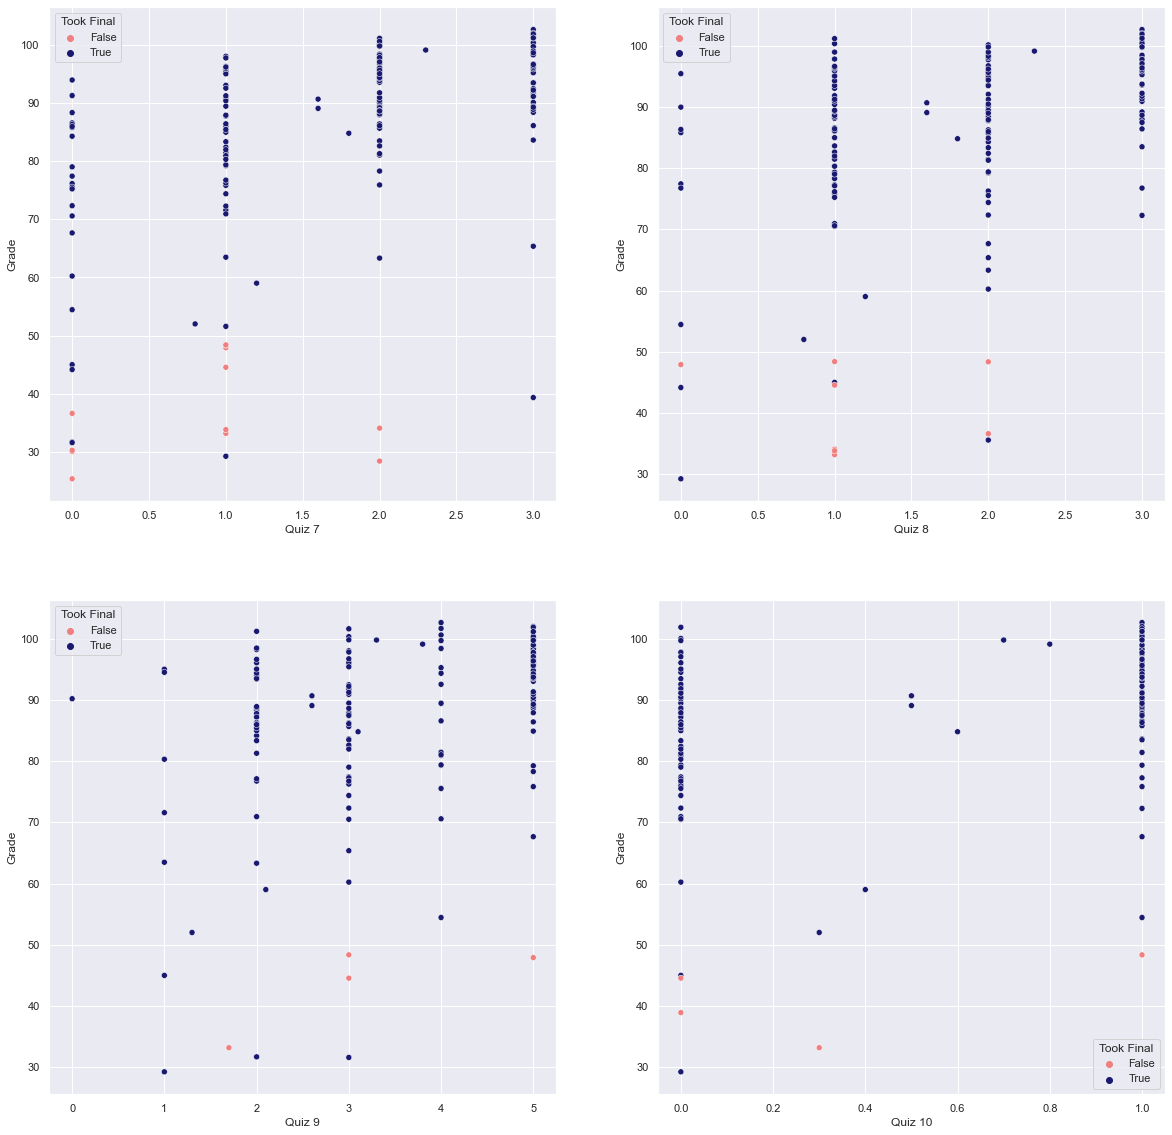

In [4]:
palette_2 = {True:"midnightblue",
           False:"lightcoral"}
sns.set()
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i in range(6):
    (a,b) = divmod(i,2)
    sns.scatterplot(data=gfs, x="Quiz "+str(i+1), y="Grade", ax=axes[a,b], palette=palette_2, hue="Took Final")

plt.savefig("Images\Quiz to Grade Scatter Plots 1-6.png")
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(20, 20))
for i in range(6,10):
    (a,b) = divmod(i,2)
    sns.scatterplot(data=gfs, x="Quiz "+str(i+1), y="Grade", ax=axes[a-3,b], palette=palette_2, hue="Took Final")

plt.savefig("Images\Quiz to Grade Scatter Plots 7-10.png")
plt.show()


Machine Learning: Linear Regression on Midterm Total Adjusted (with missing points restored for students who completed a refleciton by the due date). There are 221 data points in this case. 

0.9524150995950814


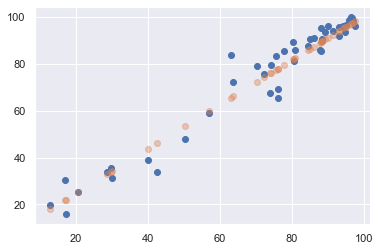

In [5]:
#Dropping columns with 0 value for midterm average
index_names = gfs[ gfs["MT"] == 0 ].index
gfs.drop(index_names, inplace = True)

gfs_cleaned = gfs[["MTA", "Grade"]].dropna()

features = np.array(gfs[["MTA"]])
#features = features.reshape(-1,1)
outcome = gfs["Grade"]

#print(features)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, 
                                                                              train_size = .8, 
                                                                              random_state = 805)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(model.score(features_test, outcome_test))

prediction = model.predict(features_test)

sns.set()

plt.scatter(features_test, outcome_test)
plt.scatter(features_test, [model.coef_*x + model.intercept_ for x in features_test], alpha=.4)

plt.savefig("Images\Midterm Adjusted Versus Grade Linear Regression.png")
plt.show()

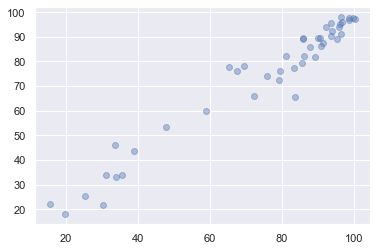

In [6]:
#I'm not sure what exactly is being plotted here. 
plt.scatter(outcome_test,prediction, alpha=.4)

Linear Regression on Midterm Total Adjusted (with missing points restored for students who completed a refleciton by the due date), but this time we drop students who did not take the final. There were 193 data points now. 

0.9092016862383429


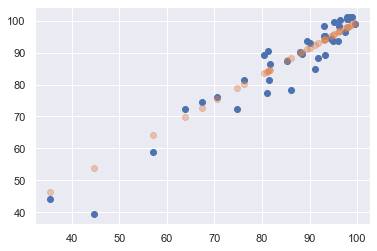

In [26]:
#Dropping columns with 0 value for midterm average
index_names = gfs[ gfs["MT"] == 0 ].index
gfs.drop(index_names, inplace = True)

#gfs_cleaned = gfs[["MTA", "Grade", "Final"]].dropna().

features = np.array(gfs[["MTA"]])
#features = features.reshape(-1,1)
outcome = gfs["Grade"]

#print(features)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, 
                                                                              train_size = .8, 
                                                                              random_state = 806)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(model.score(features_test, outcome_test))

prediction = model.predict(features_test)

sns.set()

plt.scatter(features_test, outcome_test)
plt.scatter(features_test, [model.coef_*x + model.intercept_ for x in features_test], alpha=.4)

plt.savefig("Images\Midterm Adjusted Versus Grade Linear Regression with only Students Who Took the Final.png")
plt.show()

Quiz Total Linear Regression

0.6795209765086576


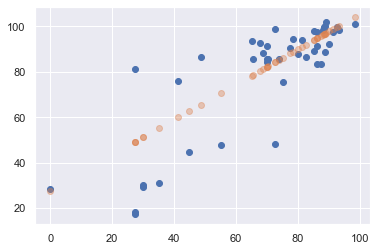

In [8]:
gfs_cleaned = gfs[["QTA", "Grade", "Final"]].dropna()

features = np.array(gfs[["QTA"]])
#features = features.reshape(-1,1)
outcome = gfs["Grade"]

#print(features)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, 
                                                                              train_size = .8, 
                                                                              random_state = 807)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(model.score(features_test, outcome_test))

prediction = model.predict(features_test)

sns.set()

plt.scatter(features_test, outcome_test)
plt.scatter(features_test, [model.coef_*x + model.intercept_ for x in features_test], alpha=.4)

plt.savefig("Images\Quiz Total Adjusted Versus Grade Linear Regression with only Students Who Took the Final.png")
plt.show()

MTA vs QTA with students who didn't take the final dropped

0.4882343607675672


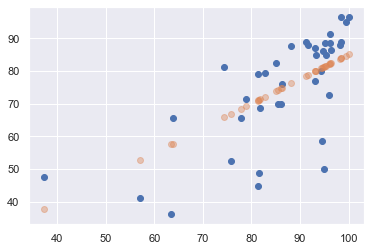

In [28]:
gfs_cleaned = gfs[["QTA", "Grade", "Final"]].dropna()

features = np.array(gfs[["MTA"]])
#features = features.reshape(-1,1)
outcome = gfs["QTA"]

#print(features)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, 
                                                                              train_size = .8, 
                                                                              random_state = 805)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(model.score(features_test, outcome_test))

prediction = model.predict(features_test)

sns.set()

plt.scatter(features_test, outcome_test)
plt.scatter(features_test, [model.coef_*x + model.intercept_ for x in features_test], alpha=.4)

plt.savefig("Images\Quiz Total Adjusted Versus Grade Linear Regression with only Students Who Took the Final.png")
plt.show()

Multilinear Regression with Homework Total, Midterm Total Adjusted and Final. It makes sense that the modeling got so accurate, because these three factors were used to directly compute 90% of the students' grade. What seems interesting is that the the quiz total had so little direct impact. I wonder how much of that is the fact that it's only 10% of the grade, and how much of it is there being a pattern between the quiz average and the other 3 factors. Let's see that in the cell below this one. 

In [21]:
#Dropping columns with 0 value for midterm average
index_names_mt = gfs.fillna(0)[ gfs["MT"] == 0].index
gfs.drop(index_names_mt, inplace = True)
index_names_final = gfs[ gfs["Took Final"] == False].index
gfs.drop(index_names_final, inplace = True)

#gfs_cleaned = gfs[["MTA", "Grade", "Final"]].dropna().

features = np.array(gfs[["HWT", "MTA", "Final"]])
#features = features.reshape(-1,1)
outcome = gfs["Grade"]

#print(features)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, 
                                                                              train_size = .8, 
                                                                              random_state = 806)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(model.score(features_test, outcome_test))

prediction = model.predict(features_test)

print(model.coef_)

0.9915350455645852
[0.22658116 0.46127847 0.29314753]


Trying to predict the adjusted quiz total from the other grading factors, based on the accuracy of the above part. Looking at the outcome below, it really seems like it was from the small part quizzes played in the grade, because the model is not accurate at all. 

In [25]:
#Dropping columns with 0 value for midterm average
index_names_mt = gfs.fillna(0)[ gfs["MT"] == 0].index
gfs.drop(index_names_mt, inplace = True)
index_names_final = gfs[ gfs["Took Final"] == False].index
gfs.drop(index_names_final, inplace = True)

#gfs_cleaned = gfs[["MTA", "Grade", "Final"]].dropna().

features = np.array(gfs[["HWT", "MTA", "Final"]])
#features = features.reshape(-1,1)
outcome = gfs["QTA"]

#print(features)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, 
                                                                              train_size = .8, 
                                                                              random_state = 806)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(model.score(features_test, outcome_test))

prediction = model.predict(features_test)

print(model.coef_)

0.5314655738254259
[ 0.26581163  0.61278468 -0.06852475]


In [22]:
#Dropping columns with 0 value for midterm average
index_names_mt = gfs.fillna(0)[ gfs["MT"] == 0].index
gfs.drop(index_names_mt, inplace = True)
index_names_final = gfs[ gfs["Took Final"] == False].index
gfs.drop(index_names_final, inplace = True)

#gfs_cleaned = gfs[["MTA", "Grade", "Final"]].dropna().

features = np.array(gfs[["HWT", "MT", "Final"]])
#features = features.reshape(-1,1)
outcome = gfs["Grade"]

#print(features)

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, 
                                                                              train_size = .8, 
                                                                              random_state = 806)

model = LinearRegression()
model.fit(features_train, outcome_train)

print(model.score(features_test, outcome_test))

prediction = model.predict(features_test)

print(model.coef_)

0.9536378528943931
[0.30989176 0.25126875 0.37525128]
